In [1]:
import os, shutil

In [2]:
# Path to the directory where the 
# original dataset was uncompressed
original_dataset_dir = '/home/student/Documents/deep_learning_practice/Chapter_05/kaggle_original_data'

In [3]:
# Directory to store the smaller dataset 
# extracted from the original one
base_dir = '/home/student//Documents/deep_learning_practice/Chapter_05/cat_and_dogs_small'

In [4]:
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

In [5]:
os.mkdir(base_dir)

In [6]:
# Directories for the training, validation 
# and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [7]:
# Directories with each holding training 
# pictures for cats and dogs respectively
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

os.mkdir(train_cat_dir)
os.mkdir(train_dog_dir)

# Directories with each holding validation 
# pictures for cats and dogs respectively
validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

os.mkdir(validation_cat_dir)
os.mkdir(validation_dog_dir)

# Directories with each holding test 
# pictures for cats and dogs respectively
test_cat_dir = os.path.join(test_dir, 'cats')
test_dog_dir = os.path.join(test_dir, 'dogs')

os.mkdir(test_cat_dir)
os.mkdir(test_dog_dir)

In [8]:
# Copies the first 1,000 
# cat images to train_cat_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 
# cat images to validation_cat_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_cat_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 
# cat images to test_cat_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)


In [9]:
# Copies the first 1,000 
# dog images to train_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 
# dog images to validation_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_dog_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 
# dog images to test_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)


As a sanity check, let's count how many pictures are in each split dataset

In [10]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Instantiating a small convnet for dogs vs. cats classification

In [11]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [12]:
model = models.Sequential()

In [13]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Configuring the model for training

In [15]:
from keras import optimizers

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Target directory
        target_size=(150, 150),  # Resizes all images to 150x150
        batch_size=20,
        class_mode='binary') # Because of the use of 
                             # binary_crossentropy, binary 
                             # labels are necessary.

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  # Target directory
        target_size=(150, 150),  # Resizes all images to 150x150
        batch_size=20,
        class_mode='binary') # Because of the use of 
                             # binary_crossentropy, binary 
                             # labels are necessary.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

for data_batch, labels_batch in validation_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Fitting the model using a batch generator

In [22]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 48s 478ms/step - loss: 0.6925 - acc: 0.5350 - val_loss: 0.6750 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 43s 432ms/step - loss: 0.6557 - acc: 0.6220 - val_loss: 0.6313 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 43s 429ms/step - loss: 0.5961 - acc: 0.6870 - val_loss: 0.6101 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 43s 429ms/step - loss: 0.5574 - acc: 0.7150 - val_loss: 0.6994 - val_acc: 0.6090
Epoch 5/30
100/100 [==============================] - 43s 426ms/step - loss: 0.5356 - acc: 0.7315 - val_loss: 0.5917 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 42s 418ms/step - loss: 0.5014 - acc: 0.7500 - val_loss: 0.5653 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 42s 419ms/step - loss: 0.4744 - acc: 0.7710 - val_loss: 0.5797 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 4

Saving the model

In [23]:
model.save('cats_and_dogs_small_1.h5')

Displaying curves of loss and accuracy during training

In [24]:
import matplotlib.pyplot as plt

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

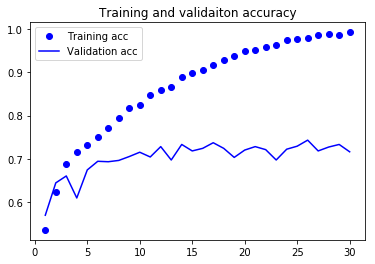

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaiton accuracy')
plt.legend()

plt.figure()

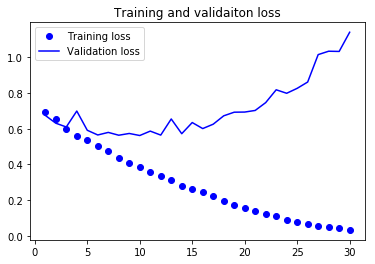

In [28]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaiton loss')
plt.legend()

plt.show()

Setting up a data augmentation configuration via ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(
    rotation_range=4.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Displaying some randomly augmented training images

In [30]:
from keras.preprocessing import image

In [31]:
fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]

In [32]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

In [33]:
x = image.img_to_array(img)

In [34]:
x = x.reshape((1,) + x.shape)

In [35]:
i = 0

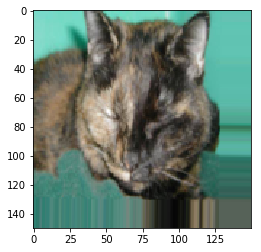

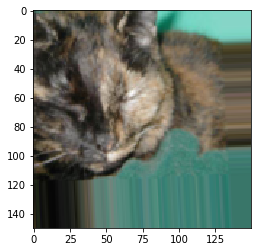

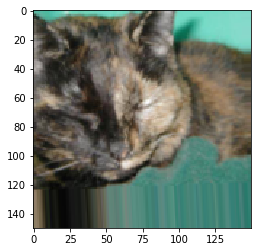

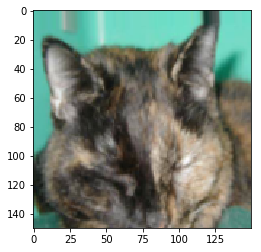

In [36]:
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [37]:
model = models.Sequential()

In [38]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Training the convnet using data-augmentation generators

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [42]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [43]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 83s 832ms/step - loss: 0.6920 - acc: 0.5184 - val_loss: 0.6768 - val_acc: 0.5749
Epoch 2/100
100/100 [==============================] - 76s 763ms/step - loss: 0.6789 - acc: 0.5672 - val_loss: 0.6588 - val_acc: 0.5966
Epoch 3/100
100/100 [==============================] - 77s 766ms/step - loss: 0.6620 - acc: 0.5903 - val_loss: 0.6720 - val_acc: 0.5793
Epoch 4/100
100/100 [==============================] - 75s 753ms/step - loss: 0.6498 - acc: 0.6140 - val_loss: 0.6625 - val_acc: 0.5715
Epoch 5/100
100/100 [==============================] - 75s 754ms/step - loss: 0.6306 - acc: 0.6350 - val_loss: 0.6029 - val_acc: 0.6732
Epoch 6/100
100/100 [==============================] - 76s 758ms/step - loss: 0.6079 - acc: 0.6628 - val_loss: 0.6325 - val_acc: 0.6430
Epoch 7/100
100/100 [==============================] - 76s 762ms/step - loss: 0.6093 - acc: 0.6628 - val_loss: 0.5975 - val_acc: 0.6720
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 84s 841ms/step - loss: 0.4215 - acc: 0.8119 - val_loss: 0.4696 - val_acc: 0.7893
Epoch 62/100
100/100 [==============================] - 83s 827ms/step - loss: 0.4258 - acc: 0.8022 - val_loss: 0.4264 - val_acc: 0.7963
Epoch 63/100
100/100 [==============================] - 86s 857ms/step - loss: 0.4194 - acc: 0.8075 - val_loss: 0.4072 - val_acc: 0.8138
Epoch 64/100
100/100 [==============================] - 91s 909ms/step - loss: 0.4223 - acc: 0.8066 - val_loss: 0.4450 - val_acc: 0.7938
Epoch 65/100
100/100 [==============================] - 78s 776ms/step - loss: 0.4049 - acc: 0.8100 - val_loss: 0.4141 - val_acc: 0.8122
Epoch 66/100
100/100 [==============================] - 81s 810ms/step - loss: 0.4181 - acc: 0.8081 - val_loss: 0.5098 - val_acc: 0.7738
Epoch 67/100
100/100 [==============================] - 79s 794ms/step - loss: 0.4106 - acc: 0.8034 - val_loss: 0.4893 - val_acc: 0.7843
Epoch 68/100
100/100 [===================

In [44]:
model.save('cats_and_dogs_small_2.h5')

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [46]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

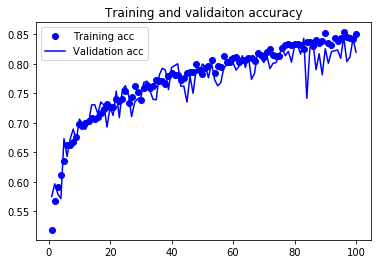

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaiton accuracy')
plt.legend()

plt.figure()

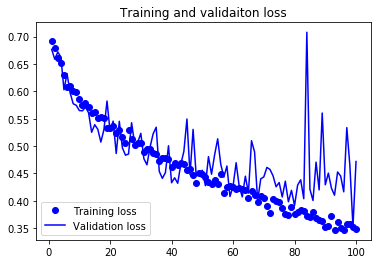

In [48]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaiton loss')
plt.legend()

plt.show()